## This notebook contains the best results the experiments done on the kaggle dataset using Tabnet

In [ ]:
#Installing required modules
!pip install pytorch-tabnet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.5/44.5 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 72.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 76.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 86.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [ ]:
!pip install optuna pytorch-tabnet --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 386.6/386.6 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 242.5/242.5 kB 12.5 MB/s eta 0:00:00


In [ ]:
!pip install optuna

In [ ]:
!pip install pytorch-tabnet lightgbm

In [ ]:
!pip install pytorch-tabnet lightgbm imbalanced-learn


In [ ]:
!pip install lightgbm -q

In [3]:
#Importing required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from pytorch_tabnet.tab_model import TabNetClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix
import torch
import matplotlib.pyplot as plt

# loading the dataset
df = pd.read_csv("/content/cardio_train.csv", sep=";")
df.drop(columns=["id"], inplace=True)

# Preprocessing
df["age"] = (df["age"] / 365).astype(int)  # converting age to years

# Encoding categorical columns
categorical_columns = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
for col in categorical_columns:
    df[col] = df[col] - df[col].min()

X = df.drop("cardio", axis=1)
y = df["cardio"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Converting to numpy arrays
X_train_np = X_train.values.astype(float)
X_test_np = X_test.values.astype(float)
y_train_np = y_train.values
y_test_np = y_test.values

cat_idxs = [X.columns.get_loc(col) for col in categorical_columns]
cat_dims = [X[col].nunique() for col in categorical_columns]

# Initializing TabNet
clf = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=8,
    n_d=32,
    n_a=32,
    n_steps=5,
    gamma=1.5,
    lambda_sparse=1e-4,
    momentum=0.3,
    optimizer_params=dict(lr=1e-2),
    verbose=1,
    seed=42
)

clf.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False,
)

# Evaluating and plotting the model results
preds = clf.predict(X_test_np)
probs = clf.predict_proba(X_test_np)[:, 1]

print(" Evaluation on Kaggle Test Set:")
print(f"Accuracy     : {accuracy_score(y_test_np, preds):.4f}")
print(f"Precision    : {precision_score(y_test_np, preds):.4f}")
print(f"Recall       : {recall_score(y_test_np, preds):.4f}")
print(f"F1 Score     : {f1_score(y_test_np, preds):.4f}")
print(f"ROC AUC      : {roc_auc_score(y_test_np, probs):.4f}")
print("\nClassification Report:\n", classification_report(y_test_np, preds))
print("Confusion Matrix:\n", confusion_matrix(y_test_np, preds))



/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/abstract_model.py:82: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
epoch 0  | loss: 0.68028 | test_accuracy: 0.50736 |  0:00:07s
epoch 1  | loss: 0.58622 | test_accuracy: 0.50271 |  0:00:16s
epoch 2  | loss: 0.57399 | test_accuracy: 0.63843 |  0:00:24s
epoch 3  | loss: 0.57184 | test_accuracy: 0.60164 |  0:00:32s
epoch 4  | loss: 0.57094 | test_accuracy: 0.66529 |  0:00:40s
epoch 5  | loss: 0.56753 | test_accuracy: 0.6815  |  0:00:49s
epoch 6  | loss: 0.56468 | test_accuracy: 0.668   |  0:00:57s
epoch 7  | loss: 0.56188 | test_accuracy: 0.67893 |  0:01:06s
epoch 8  | loss: 0.56242 | test_accuracy: 0.66836 |  0:01:13s
epoch 9  | loss: 0.5616  | test_accuracy: 0.68721 |  0:01:21s
epoch 10 | loss: 0.55899 | test_accuracy: 0.66571 |  0:01:30s
epoch 11 | loss: 0.55735 | test_accuracy: 0.67357 |  0:01:37s
epoch 12 | loss: 0.55563 | test_accuracy: 0.7075  |  0:01:46s
epoch 13 | loss: 0.55531 | test_accura

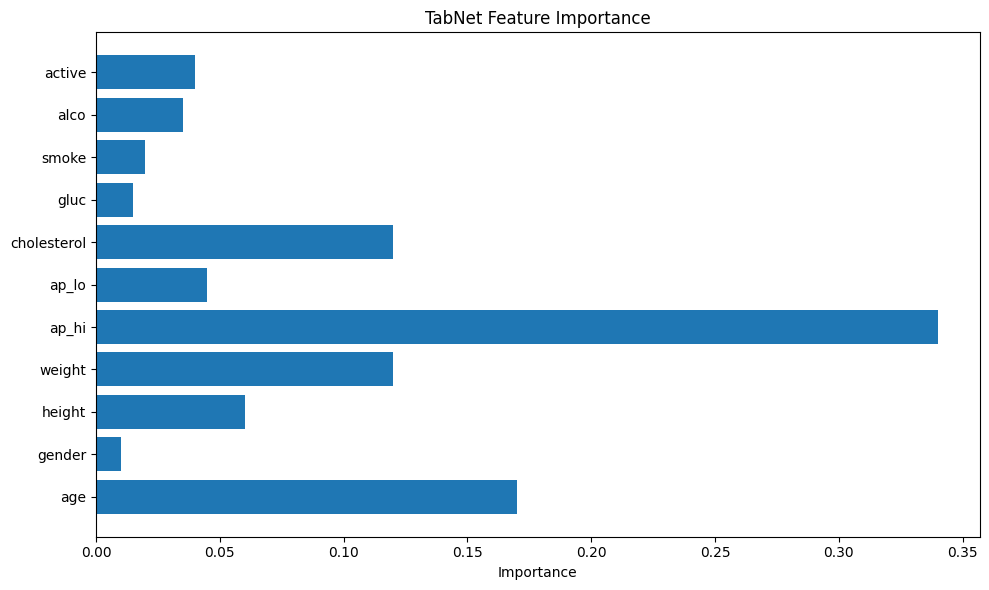

In [2]:
feature_names = X.columns
importances = clf.feature_importances_

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances)
plt.xlabel("Importance")
plt.title("TabNet Feature Importance")
plt.gca().invert_yaxis()
plt.grid(True)
plt.show()


## In this Experiment feature selection with LightGBM is performed and then trained a TabNet classifier using the Kaggle dataset

In [4]:
#Importing required librareis
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score, f1_score, precision_score, recall_score,
    roc_auc_score, average_precision_score
)
from lightgbm import LGBMClassifier
from pytorch_tabnet.tab_model import TabNetClassifier
import matplotlib.pyplot as plt

# Loading the kaggle dataset
df = pd.read_csv("cardio_train.csv", sep=';')
df.drop(columns=['id'], inplace=True)

# Feature engineering
df["bmi"] = df["weight"] / ((df["height"] / 100) ** 2)
df["pulse_pressure"] = df["ap_hi"] - df["ap_lo"]
df["age_years"] = (df["age"] / 365).astype(int)

# Dropping outliers
df = df[(df["ap_hi"] > 80) & (df["ap_hi"] < 250)]
df = df[(df["ap_lo"] > 40) & (df["ap_lo"] < 150)]

cat_cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
for col in cat_cols:
    df[col] = df[col].astype(int) - df[col].min()

# Splitting into feature and target setup
target = "cardio"
all_features = [
    "age_years", "gender", "ap_hi", "ap_lo", "cholesterol", "gluc",
    "smoke", "alco", "active", "bmi", "pulse_pressure"
]
X = df[all_features]
y = df[target]

# feature selection with LightGBM
lgb = LGBMClassifier(n_estimators=100, random_state=42)
lgb.fit(X, y)
importances = pd.Series(lgb.feature_importances_, index=X.columns).sort_values(ascending=False)
selected_features = importances[importances > 10].index.tolist()

X = X[selected_features]

# Recalculating cat_idxs and cat_dims sicne we have added feature filtering
cat_idxs = []
cat_dims = []

for col in cat_cols:
    if col in X.columns:
        col_idx = X.columns.get_loc(col)
        X[col] = X[col].astype(int)
        X[col] = X[col] - X[col].min()
        unique_vals = X[col].nunique()
        cat_idxs.append(col_idx)
        cat_dims.append(unique_vals)
        X[col] = X[col].clip(0, unique_vals - 1)


<ipython-input-10-6cb333561cb8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int) - df[col].min()
<ipython-input-10-6cb333561cb8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].astype(int) - df[col].min()
<ipython-input-10-6cb333561cb8>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [5]:
# Splitting into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

X_train_np = X_train.values.astype(np.float32)
X_val_np = X_val.values.astype(np.float32)
y_train_np = y_train.values
y_val_np = y_val.values

# Intializaing the TabNet model
model = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=6,
    n_d=48,
    n_a=48,
    n_steps=7,
    gamma=1.5,
    lambda_sparse=1e-4,
    momentum=0.3,
    optimizer_params={"lr": 0.02},
    seed=42,
    verbose=1,
    mask_type='entmax'
)

# Training the model
model.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_train_np, y_train_np), (X_val_np, y_val_np)],
    eval_name=["train", "valid"],
    eval_metric=["accuracy"],
    max_epochs=200,
    patience=30,
    batch_size=512,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

y_pred = model.predict(X_val_np) # Evaluating the model
y_proba = model.predict_proba(X_val_np)[:, 1]

print("\n Final Evaluation Metrics")
print(f"Accuracy:  {accuracy_score(y_val_np, y_pred):.4f}")
print(f"F1 Score:  {f1_score(y_val_np, y_pred):.4f}")
print(f"Precision: {precision_score(y_val_np, y_pred):.4f}")
print(f"Recall:    {recall_score(y_val_np, y_pred):.4f}")
print(f"AUROC:     {roc_auc_score(y_val_np, y_proba):.4f}")
print(f"AUPRC:     {average_precision_score(y_val_np, y_proba):.4f}")


epoch 0  | loss: 0.6882  | train_accuracy: 0.49503 | valid_accuracy: 0.49515 |  0:00:24s
epoch 1  | loss: 0.57276 | train_accuracy: 0.55819 | valid_accuracy: 0.55964 |  0:00:46s
epoch 2  | loss: 0.56873 | train_accuracy: 0.68154 | valid_accuracy: 0.68418 |  0:01:09s
epoch 3  | loss: 0.5641  | train_accuracy: 0.724   | valid_accuracy: 0.72062 |  0:01:31s
epoch 4  | loss: 0.56063 | train_accuracy: 0.7253  | valid_accuracy: 0.7201  |  0:01:54s
epoch 5  | loss: 0.56058 | train_accuracy: 0.72849 | valid_accuracy: 0.72346 |  0:02:17s
epoch 6  | loss: 0.55611 | train_accuracy: 0.72914 | valid_accuracy: 0.72688 |  0:02:40s
epoch 7  | loss: 0.55488 | train_accuracy: 0.73    | valid_accuracy: 0.72841 |  0:03:02s
epoch 8  | loss: 0.55282 | train_accuracy: 0.73222 | valid_accuracy: 0.72725 |  0:03:25s
epoch 9  | loss: 0.55273 | train_accuracy: 0.73339 | valid_accuracy: 0.73045 |  0:03:48s
epoch 10 | loss: 0.54974 | train_accuracy: 0.73335 | valid_accuracy: 0.72732 |  0:04:10s
epoch 11 | loss: 0.5

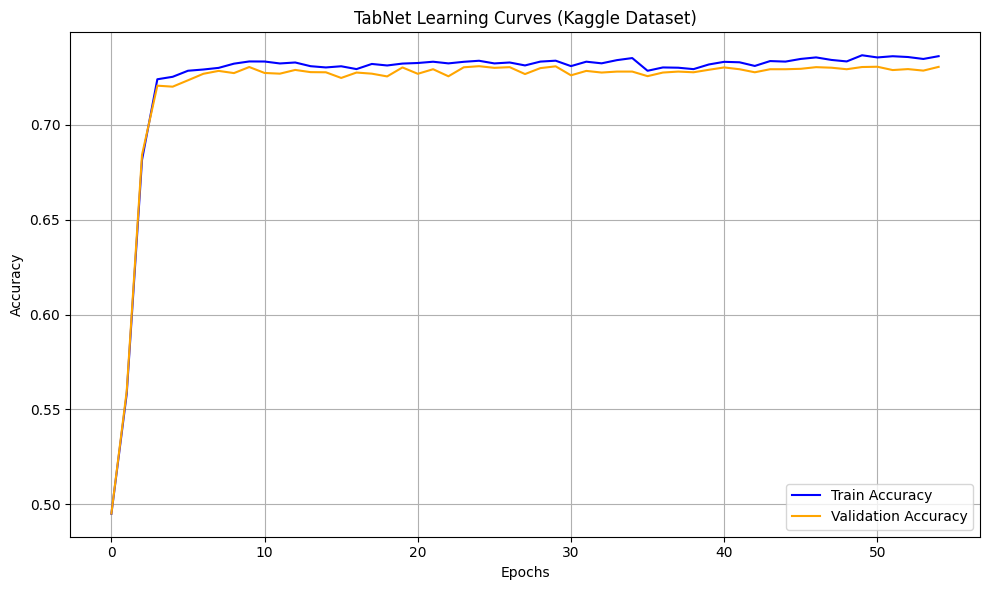

In [6]:
# Plotting the learning curves
plt.plot(model.history['train_accuracy'], label="Train Accuracy")
plt.plot(model.history['valid_accuracy'], label="Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("TabNet Learning Curves (Kaggle Dataset)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


## Hyperparameter optimization and evaluation of a TabNet model on the Kaggle dataset using optuna

In [9]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import optuna
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve, precision_recall_curve, average_precision_score
from pytorch_tabnet.tab_model import TabNetClassifier

# Laoding reqruired dataset
df = pd.read_csv("/content/cardio_train.csv", sep=";")
df.drop(columns=["id"], inplace=True)
df["age"] = (df["age"] / 365).astype(int)

# Removing outliers
df = df[(df["ap_hi"] < 250) & (df["ap_hi"] > 80)]
df = df[(df["ap_lo"] < 200) & (df["ap_lo"] > 40)]
df = df[(df["height"] < 220) & (df["height"] > 130)]
df = df[(df["weight"] < 200) & (df["weight"] > 30)]

cat_cols = ["gender", "cholesterol", "gluc", "smoke", "alco", "active"]
for col in cat_cols:
    df[col] = df[col] - df[col].min()

X = df.drop("cardio", axis=1)
y = df["cardio"]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

cat_idxs = [X.columns.get_loc(col) for col in cat_cols]
cat_dims = [X[col].nunique() for col in cat_cols]

X_train_np, X_test_np = X_train.values, X_test.values
y_train_np, y_test_np = y_train.values, y_test.values

# Optuna inialization
def objective(trial):
    clf = TabNetClassifier(
        cat_idxs=cat_idxs,
        cat_dims=cat_dims,
        cat_emb_dim=trial.suggest_int("cat_emb_dim", 2, 10),
        n_d=trial.suggest_int("n_d", 8, 64),
        n_a=trial.suggest_int("n_a", 8, 64),
        n_steps=trial.suggest_int("n_steps", 3, 10),
        gamma=trial.suggest_float("gamma", 1.0, 2.5),
        lambda_sparse=trial.suggest_float("lambda_sparse", 1e-6, 1e-2),
        optimizer_params={"lr": trial.suggest_float("lr", 1e-3, 2e-2)},
        verbose=0,
        seed=42
    )
    clf.fit(
        X_train=X_train_np, y_train=y_train_np,
        eval_set=[(X_test_np, y_test_np)],
        eval_name=["test"],
        eval_metric=["accuracy"],
        max_epochs=50,
        patience=10,
        batch_size=1024,
        virtual_batch_size=128,
        num_workers=0,
        drop_last=False
    )
    preds = clf.predict(X_test_np)
    return accuracy_score(y_test_np, preds)

# Running optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=20)


[I 2025-06-05 05:28:29,744] A new study created in memory with name: no-name-01b017a2-2808-43bd-b687-b8b71ddd279c

Early stopping occurred at epoch 46 with best_epoch = 36 and best_test_accuracy = 0.734
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-06-05 05:33:29,960] Trial 0 finished with value: 0.7340045232363026 and parameters: {'cat_emb_dim': 8, 'n_d': 16, 'n_a': 52, 'n_steps': 3, 'gamma': 2.4874352161634863, 'lambda_sparse': 0.0010225840695019626, 'lr': 0.009467740579776812}. Best is trial 0 with value: 0.7340045232363026.

Early stopping occurred at epoch 31 with best_epoch = 21 and best_test_accuracy = 0.73247
/usr/local/lib/python3.11/dist-packages/pytorch_tabnet/callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2025-06-05 05:38:17,572] Trial 1 finished with value: 0.7324724593273509 and para

In [11]:
print("\n Best Parameters:")
print(study.best_params)

# Training final model again
best = study.best_params
final_clf = TabNetClassifier(
    cat_idxs=cat_idxs,
    cat_dims=cat_dims,
    cat_emb_dim=best["cat_emb_dim"],
    n_d=best["n_d"],
    n_a=best["n_a"],
    n_steps=best["n_steps"],
    gamma=best["gamma"],
    lambda_sparse=best["lambda_sparse"],
    optimizer_params={"lr": best["lr"]},
    verbose=1,
    seed=42
)

final_clf.fit(
    X_train=X_train_np, y_train=y_train_np,
    eval_set=[(X_test_np, y_test_np)],
    eval_name=["test"],
    eval_metric=["accuracy"],
    max_epochs=100,
    patience=10,
    batch_size=1024,
    virtual_batch_size=128,
    num_workers=0,
    drop_last=False
)

# Evaluating the model
preds = final_clf.predict(X_test_np)
probs = final_clf.predict_proba(X_test_np)[:, 1]

print("\n Final Evaluation:")
print("Accuracy :", accuracy_score(y_test_np, preds))
print("F1 Score :", f1_score(y_test_np, preds))
print("Precision:", precision_score(y_test_np, preds))
print("Recall   :", recall_score(y_test_np, preds))
print("ROC AUC  :", roc_auc_score(y_test_np, probs))
print("\n", classification_report(y_test_np, preds))


Best Parameters:
{'cat_emb_dim': 2, 'n_d': 38, 'n_a': 37, 'n_steps': 6, 'gamma': 1.0273917020919288, 'lambda_sparse': 0.009535156435674815, 'lr': 0.007997187328699551}
epoch 0  | loss: 0.67561 | test_accuracy: 0.49442 |  0:00:11s
epoch 1  | loss: 0.57826 | test_accuracy: 0.58248 |  0:00:22s
epoch 2  | loss: 0.56652 | test_accuracy: 0.53878 |  0:00:33s
epoch 3  | loss: 0.56294 | test_accuracy: 0.57285 |  0:00:45s
epoch 4  | loss: 0.55922 | test_accuracy: 0.66951 |  0:00:56s
epoch 5  | loss: 0.55916 | test_accuracy: 0.71343 |  0:01:08s
epoch 6  | loss: 0.55888 | test_accuracy: 0.7227  |  0:01:19s
epoch 7  | loss: 0.55723 | test_accuracy: 0.72897 |  0:01:30s
epoch 8  | loss: 0.55589 | test_accuracy: 0.72802 |  0:01:42s
epoch 9  | loss: 0.55449 | test_accuracy: 0.73182 |  0:01:53s
epoch 10 | loss: 0.55511 | test_accuracy: 0.72904 |  0:02:04s
epoch 11 | loss: 0.55334 | test_accuracy: 0.73218 |  0:02:15s
epoch 12 | loss: 0.55288 | test_accuracy: 0.73058 |  0:02:26s
epoch 13 | loss: 0.55277 